In [43]:
# 필요라이브러리 호출
import pandas as pd # 데이터 읽으려고
import matplotlib.pyplot as plt # 플랏하려면 기본적으로 필요
import seaborn as sns # Heatmap 하려고

from sklearn.model_selection import train_test_split # 데이터 스플릿용
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀분석모델 사용
from sklearn.metrics import accuracy_score # Accuracy 측정하려고

In [44]:
# Data 불러오기
df = pd.read_csv('data.csv')

In [45]:
# 3. df 분석
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
# 4. 불필요한 열 제거
df = df.drop(columns= ['id','Unnamed: 32'])

In [47]:
# 5. y mapping
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [48]:
# 6. y와 불필요한 열 제거한걸 corr 조사해서 corr 높은걸로 상위 10개만 남김
corr = df.corr()['diagnosis'].abs().sort_values(ascending=False) # corr는 series
best10 = corr.index[1:11]
best10

Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean', 'concavity_worst'],
      dtype='object')

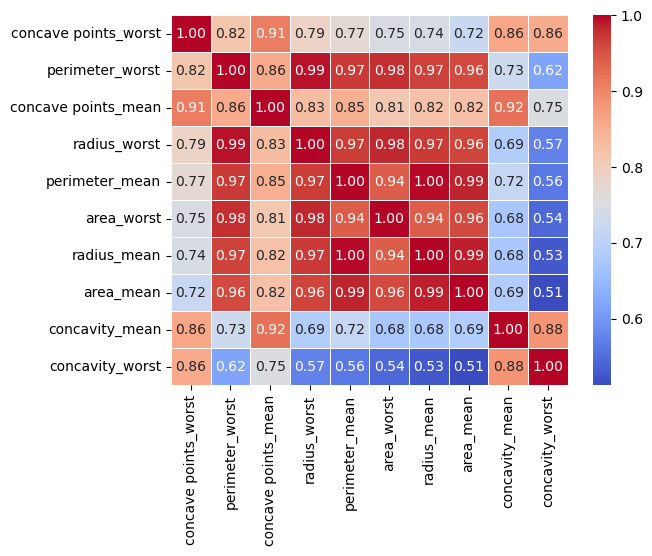

In [49]:
# 7. 상위 10개 끼리의 corr, 0.9이상(중복) 제거
repeat_reduce = df[best10].corr()

sns.heatmap(repeat_reduce, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5) # Heatmap 은 seaborn에서 된다

# sns.heatmap() → 주어진 데이터프레임(행렬)을 히트맵으로 시각화
# repeat_reduce → 히트맵을 그릴 데이터 (일반적으로 상관관계 행렬)
# annot=True → 셀 안에 숫자 값(상관계수) 표시
# fmt=".2f" → 숫자 값을 소수점 둘째 자리까지 표시
# cmap="coolwarm" → 색상 테마(파란색=음의 상관관계, 빨간색=양의 상관관계)
# linewidths=0.5 → 셀 간의 경계선 두께 설정

plt.show()


In [50]:
# 최종 선택한 피쳐
selected_final_features = ['concave points_worst','perimeter_worst','concavity_mean','concavity_worst']

In [51]:
# 8. 제거하고 남은 피쳐를 갖고 X= df[F], y=df[y] 데이터 생서ㅏㅇㅇ
X = df[selected_final_features]
y = df['diagnosis']

In [52]:
# 9. X,y를 스플릿, k-fold

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# 10. 로지스틱 모델 학습
breast_cancer_model = LogisticRegression() # breast_cancer_model 은 객체!!!!!!
breast_cancer_model.fit(train_X,train_y)

LogisticRegression()

In [54]:
# 11. 학습다된 모델, Test 진행, Accuracy 출력, countplot으로 결과 출력
predict_y = breast_cancer_model.predict(test_X) # .predict 
accuracy = accuracy_score(test_y, predict_y)

print(f"Logistic Regression Model's Accuracy : {accuracy:.4f}")

Logistic Regression Model's Accuracy : 0.9737


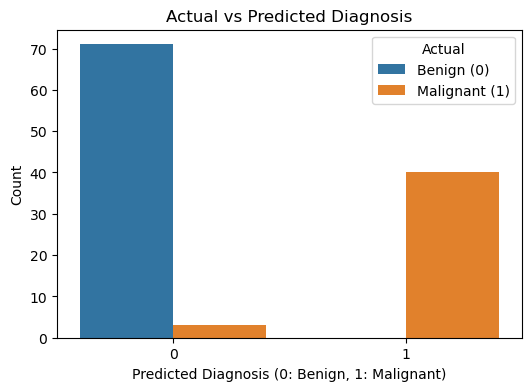

In [55]:
# 예측 결과 DataFrame 생성
df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predict_y})

# countplot 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicted', hue='Actual', data=df_results)
plt.title('Actual vs Predicted Diagnosis')
plt.xlabel('Predicted Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.legend(title="Actual", labels=["Benign (0)", "Malignant (1)"])
plt.show()